In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.dpi'] = 450

In [2]:
directory = '/Volumes/Data2/RST/notebook/'

In [3]:
ward_trips = pd.read_csv(directory + 'TTS OD/WARD_TYPE.csv')
ward_trips

,ward_o,ward_d,type,total
0,1,1,ab_am,0.552704
1,1,1,ab_ev,0.118363
2,1,1,ab_md,0.811149
3,1,1,ab_pm,0.973774
4,1,1,bl_am,168.513442
...,...,...,...,...
15777,25,25,rac_pm,399.066513
15778,25,25,raw_am,423.889255
15779,25,25,raw_ev,206.497937
15780,25,25,raw_md,140.284162


In [8]:
gamma = pd.read_csv('degree-of-connectivity.csv')

In [9]:
ward_trips['group'] = ward_trips['type'].str.split('_', expand = True)[0]
ward_trips['period'] = ward_trips['type'].str.split('_', expand = True)[1].str.upper()


In [10]:
ward_trip_total = ward_trips.groupby(['group', 'period']).sum()[['total']].reset_index()

In [11]:
origin_gamma = ward_trips.merge(gamma[['ward', 'gamma', 'period']], left_on = ['ward_o', 'period'], right_on = ['ward', 'period'])
origin_gamma['weighted_gamma'] = origin_gamma['gamma'] * origin_gamma['total']  
origin_gamma = origin_gamma.groupby(['group', 'period']).sum()[['weighted_gamma']].reset_index().sort_values(
    by = ['period', 'weighted_gamma'], ascending =  False)

In [12]:
origin_gamma = origin_gamma.merge(ward_trip_total)
origin_gamma['avg_gamma'] = origin_gamma['weighted_gamma']/origin_gamma['total']
origin_gamma.sort_values(by = ['period', 'avg_gamma'], ascending =  False)

,group,period,weighted_gamma,total,avg_gamma
4,bl,PM,2.625433e+05,15936.260026,16.474584
3,lico,PM,8.400022e+05,51047.772549,16.455217
2,c0,PM,1.175257e+06,71456.318609,16.447203
7,ab,PM,5.996706e+03,365.565840,16.403902
1,rac,PM,1.611471e+06,98678.217618,16.330560
5,imm,PM,2.371102e+05,14543.038559,16.304035
0,raw,PM,3.325983e+06,204036.850191,16.300894
6,lep,PM,1.455791e+05,8962.136141,16.243789
12,bl,MD,7.092149e+04,5579.772755,12.710462
11,lico,MD,3.445236e+05,27313.473066,12.613687


In [13]:
dest_gamma = ward_trips.merge(gamma[['ward', 'gamma', 'period']], left_on = ['ward_d', 'period'], right_on = ['ward', 'period'])
dest_gamma['weighted_gamma'] = dest_gamma['gamma'] * dest_gamma['total']  
dest_gamma = dest_gamma.groupby(['group', 'period']).sum()[['weighted_gamma']].reset_index().sort_values(
    by = ['period', 'weighted_gamma'], ascending =  False)

dest_gamma = dest_gamma.merge(ward_trip_total)
dest_gamma['avg_gamma'] = dest_gamma['weighted_gamma']/dest_gamma['total']
dest_gamma.sort_values(by = ['period', 'avg_gamma'], ascending =  False)

,group,period,weighted_gamma,total,avg_gamma
4,bl,PM,2.708230e+05,15936.260026,16.994135
7,ab,PM,6.128788e+03,365.565840,16.765210
3,lico,PM,8.550571e+05,51047.772549,16.750136
1,rac,PM,1.633446e+06,98678.217618,16.553253
0,raw,PM,3.372644e+06,204036.850191,16.529583
5,imm,PM,2.385773e+05,14543.038559,16.404915
6,lep,PM,1.467984e+05,8962.136141,16.379843
2,c0,PM,1.170202e+06,71456.318609,16.376465
12,bl,MD,7.005203e+04,5579.772755,12.554639
11,lico,MD,3.387399e+05,27313.473066,12.401935


In [14]:
od_gamma = ward_trips.merge(gamma[['ward', 'gamma', 'period']], left_on = ['ward_o', 'period'], right_on = ['ward', 'period'])
od_gamma = od_gamma.merge(gamma[['ward', 'gamma', 'period']], left_on = ['ward_d', 'period'], right_on = ['ward', 'period'])
od_gamma['od_gamma'] = (od_gamma['gamma_x'] + od_gamma['gamma_y'])/2

In [15]:
od_gamma['weighted_gamma'] = od_gamma['od_gamma'] * od_gamma['total']  
od_gamma = od_gamma.groupby(['group', 'period']).sum()[['weighted_gamma']].reset_index().sort_values(
    by = ['period', 'weighted_gamma'], ascending =  False)

od_gamma = od_gamma.merge(ward_trip_total)
od_gamma['avg_gamma'] = od_gamma['weighted_gamma']/od_gamma['total']
od_gamma.sort_values(by = ['period', 'avg_gamma'], ascending =  False)

,group,period,weighted_gamma,total,avg_gamma
4,bl,PM,2.666831e+05,15936.260026,16.734359
3,lico,PM,8.475297e+05,51047.772549,16.602676
7,ab,PM,6.062747e+03,365.565840,16.584556
1,rac,PM,1.622458e+06,98678.217618,16.441907
0,raw,PM,3.349314e+06,204036.850191,16.415239
2,c0,PM,1.172729e+06,71456.318609,16.411834
5,imm,PM,2.378438e+05,14543.038559,16.354475
6,lep,PM,1.461887e+05,8962.136141,16.311816
12,bl,MD,7.048676e+04,5579.772755,12.632550
11,lico,MD,3.416318e+05,27313.473066,12.507811


In [16]:
od_gamma = od_gamma.sort_values(by = ['period', 'group'], ascending =  False)

In [17]:
group_df = pd.DataFrame.from_records([['Racialized', 'rac'],
 ['Black', 'bl'],
[ 'Recent\nImmigrants', 'imm'],
 ['Low\nIncome', 'lico'],
[ 'Carless\nHouseholds', 'c0'],
[ 'LEP', 'lep'],
[ 'General\nPopulation', 'raw']], columns = ['Group String', 'group'])

In [18]:
origin_gamma = origin_gamma.merge(group_df)
dest_gamma = dest_gamma.merge(group_df)
od_gamma = od_gamma.merge(group_df)


In [19]:
od_gamma_pivot = od_gamma.pivot('period', 'Group String', 'avg_gamma').reindex(['EM','AM','MD','PM','EV'],axis = 0)
od_gamma_pivot = od_gamma_pivot.reindex(['Black', 'Low\nIncome', 'LEP', 'General\nPopulation',
                                    'Carless\nHouseholds', 'Racialized', 'Recent\nImmigrants'],axis = 1)

In [20]:
od_gamma_pivot

Group String,Black,Low\nIncome,LEP,General\nPopulation,Carless\nHouseholds,Racialized,Recent\nImmigrants
period,,,,,,,
EM,1.812299,1.850864,1.814387,1.859791,1.876268,1.841423,1.873175
AM,18.892555,18.749367,18.300780,18.428940,18.489866,18.455083,18.389926
MD,12.632550,12.507811,12.266648,12.307665,12.383519,12.330571,12.362427
PM,16.734359,16.602676,16.311816,16.415239,16.411834,16.441907,16.354475
EV,11.192976,11.046520,10.972101,10.909177,10.979248,10.969746,10.889043


In [21]:
od_gamma_pivot_n = od_gamma_pivot.div(od_gamma_pivot.max(axis=1), axis=0)
od_gamma_pivot_n

Group String,Black,Low\nIncome,LEP,General\nPopulation,Carless\nHouseholds,Racialized,Recent\nImmigrants
period,,,,,,,
EM,0.965906,0.986461,0.967019,0.991219,1.000000,0.981429,0.998352
AM,1.000000,0.992421,0.968677,0.975460,0.978685,0.976844,0.973395
MD,1.000000,0.990126,0.971035,0.974282,0.980287,0.976095,0.978617
PM,1.000000,0.992131,0.974750,0.980930,0.980727,0.982524,0.977299
EV,1.000000,0.986915,0.980267,0.974645,0.980905,0.980056,0.972846


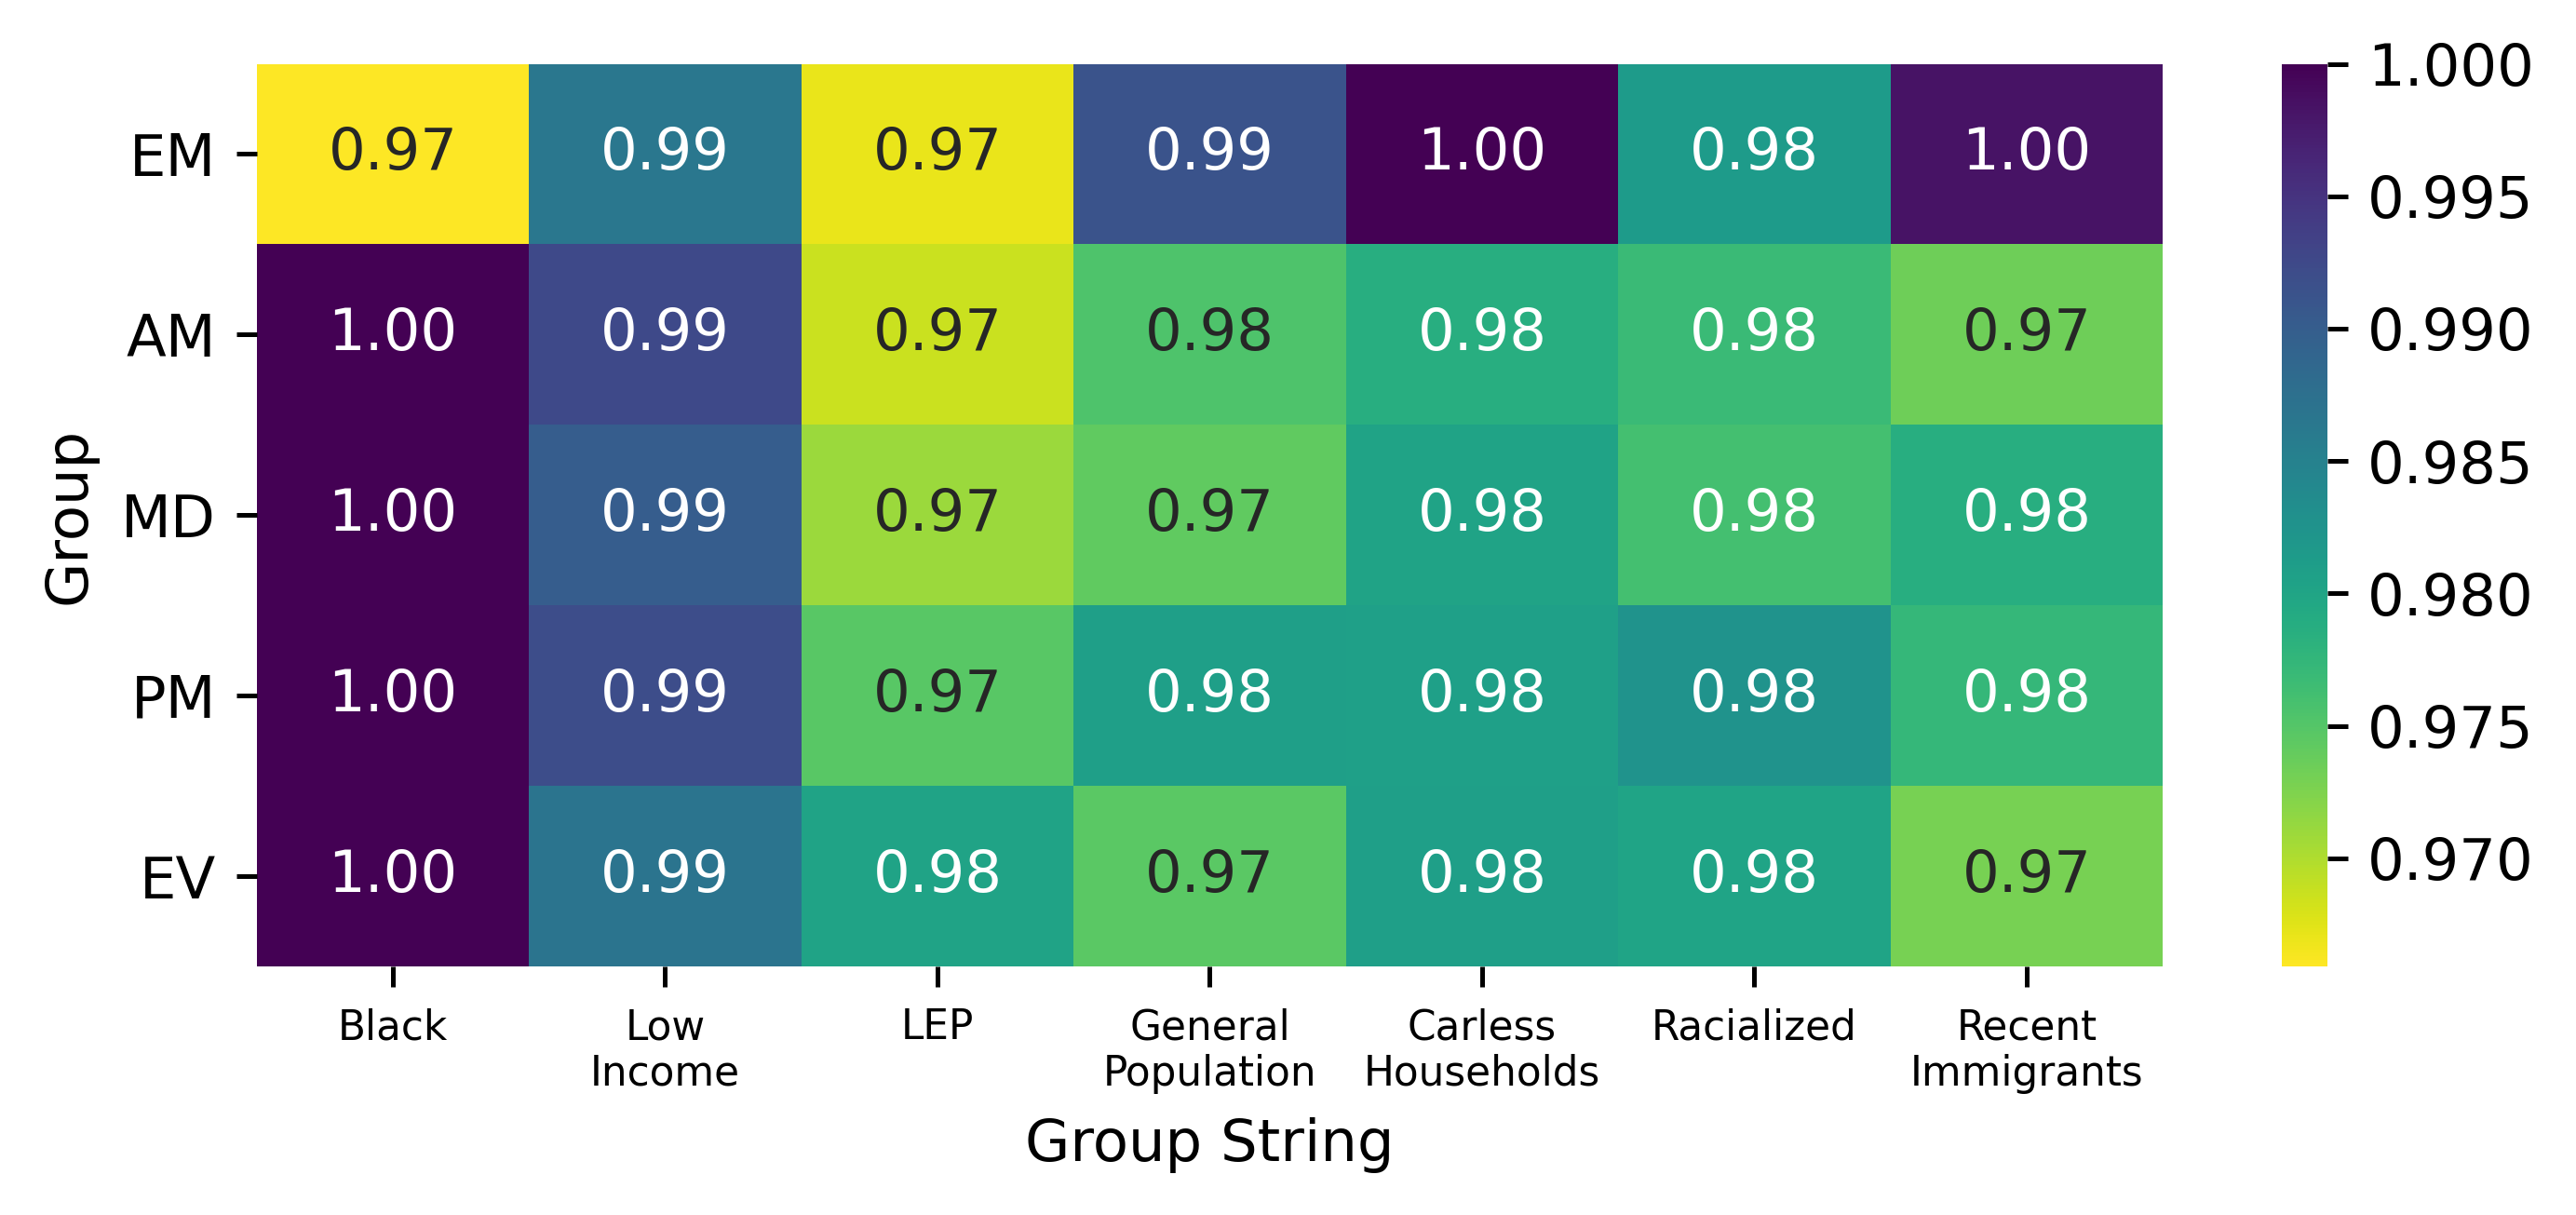

In [22]:
import seaborn as sns

fig, ax = plt.subplots()

fig.set_size_inches([6.5,3])

sns.heatmap(od_gamma_pivot_n, ax = ax, cmap = 'viridis_r', annot=True, fmt = '.2f', 
                vmin = od_gamma_pivot_n.min().min(), vmax = 1)

ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=0)

ax.set_ylabel('Period')
ax.set_ylabel('Group')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 7)
plt.tight_layout()
plt.savefig('gamma.png', dpi = 300)